<a href="https://www.kaggle.com/code/kartikanagawadi/loandefault?scriptVersionId=117117054" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re

In [2]:
train_df = pd.read_csv('/kaggle/input/loandefault/train.csv',index_col='ID')
test_df = pd.read_csv('/kaggle/input/loandefault/test.csv',index_col='ID')

In [3]:
test_df.isnull().sum()

Loan Amount                         0
Funded Amount                       0
Funded Amount Investor              0
Term                                0
Batch Enrolled                      0
Interest Rate                       0
Grade                               0
Sub Grade                           0
Employment Duration                 0
Home Ownership                      0
Verification Status                 0
Payment Plan                        0
Loan Title                          0
Debit to Income                     0
Delinquency - two years             0
Inquires - six months               0
Open Account                        0
Public Record                       0
Revolving Balance                   0
Revolving Utilities                 0
Total Accounts                      0
Initial List Status                 0
Total Received Interest             0
Total Received Late Fee             0
Recoveries                          0
Collection Recovery Fee             0
Collection 1

In [4]:
train_df.sort_values(by=['ID']).head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
ID,,,,,,,,,,,,,,,,,,,,,
1297933,2902,8159,8785.070201,59,BAT1766061,8.167615,A,C1,MORTGAGE,27086.68381,...,4.335920,1.214076,0,INDIVIDUAL,70,0,23,28620,33285,1
1298156,9337,11189,14873.657140,59,BAT2333412,12.351163,B,A5,MORTGAGE,34341.57381,...,0.001068,1.018925,0,INDIVIDUAL,88,0,44,25035,33027,0
1298576,19660,10611,13738.298970,58,BAT3873588,11.249427,D,B4,RENT,41915.06821,...,7.194538,0.920453,0,INDIVIDUAL,89,0,33,282597,21418,0
1298988,16627,5785,11742.043470,36,BAT1780517,8.634784,B,D1,MORTGAGE,48695.87180,...,2.147033,0.237033,0,INDIVIDUAL,14,0,37,111224,2443,0
1299125,16883,11083,16062.565970,59,BAT2522922,9.404523,E,C3,MORTGAGE,58181.32968,...,6.506246,0.262986,0,INDIVIDUAL,24,0,40,187611,5360,0


In [5]:
train_df.shape

(67463, 34)

In [6]:
#Check Duplicates and drop if any
train_df.duplicated().sum()

0

In [7]:
cols=[i for i in train_df.columns]
cols

['Loan Amount',
 'Funded Amount',
 'Funded Amount Investor',
 'Term',
 'Batch Enrolled',
 'Interest Rate',
 'Grade',
 'Sub Grade',
 'Employment Duration',
 'Home Ownership',
 'Verification Status',
 'Payment Plan',
 'Loan Title',
 'Debit to Income',
 'Delinquency - two years',
 'Inquires - six months',
 'Open Account',
 'Public Record',
 'Revolving Balance',
 'Revolving Utilities',
 'Total Accounts',
 'Initial List Status',
 'Total Received Interest',
 'Total Received Late Fee',
 'Recoveries',
 'Collection Recovery Fee',
 'Collection 12 months Medical',
 'Application Type',
 'Last week Pay',
 'Accounts Delinquent',
 'Total Collection Amount',
 'Total Current Balance',
 'Total Revolving Credit Limit',
 'Loan Status']

In [8]:
train_df.describe()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,14.266561,...,1.143969,59.691578,1.125141,0.021301,71.163260,0.0,146.467990,1.595739e+05,23123.005544,0.092510
std,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,6.225060,...,5.244365,357.026346,3.489885,0.144385,43.315845,0.0,744.382233,1.390332e+05,20916.699999,0.289747
min,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,2.000000,...,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,10.000000,...,0.021114,1.629818,0.476259,0.000000,35.000000,0.0,24.000000,5.037900e+04,8155.500000,0.000000
50%,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,13.000000,...,0.043398,3.344524,0.780141,0.000000,68.000000,0.0,36.000000,1.183690e+05,16733.000000,0.000000
75%,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,16.000000,...,0.071884,5.453727,1.070566,0.000000,105.000000,0.0,46.000000,2.283750e+05,32146.500000,0.000000
max,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,37.000000,...,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


In [9]:
train_df['Loan Status'].value_counts() # Highly imbalanced dataset
zero=len(train_df[train_df['Loan Status']==0])/len(train_df) * 100
one = 100 - zero
print('{}% of values are 0   \n {}% values are 1'.format(round(zero,2),round(one,2)))

90.75% of values are 0   
 9.25% values are 1


In [10]:
train_df.isnull().sum().sum() #We have no null values

0

In [11]:
train_df.dtypes.value_counts()

int64      16
float64     9
object      9
dtype: int64

In [12]:
train_df.nunique()

Loan Amount                     27525
Funded Amount                   24548
Funded Amount Investor          67441
Term                                3
Batch Enrolled                     41
Interest Rate                   67448
Grade                               7
Sub Grade                          35
Employment Duration                 3
Home Ownership                  67454
Verification Status                 3
Payment Plan                        1
Loan Title                        109
Debit to Income                 67454
Delinquency - two years             9
Inquires - six months               6
Open Account                       36
Public Record                       5
Revolving Balance               20582
Revolving Utilities             67458
Total Accounts                     69
Initial List Status                 2
Total Received Interest         67451
Total Received Late Fee         67380
Recoveries                      67387
Collection Recovery Fee         67313
Collection 1

In [13]:
# Account Delinquent has only one value which is irrelavent hence drop it
train_df.drop('Accounts Delinquent',1,inplace=True)
test_df.drop('Accounts Delinquent',1,inplace=True)

In [14]:
# Select object type data and numerical data columns seperately
cate = [i for i in train_df.select_dtypes(include='object').columns]
num = [i for i in train_df.select_dtypes(exclude='object').columns]

In [15]:
# Functions to plot
def plot_numeric(feature,data=train_df):
    plt.figure(figsize=(12,8))
    sns.displot(data=data,x=feature,hue='Loan Status')
    plt.title(feature)
    plt.show()
    plt.figure(figsize=(12,8))
    sns.scatterplot(data=data,x=feature,y='Loan Status')
    plt.title(feature)
    plt.show()
    
    
def plot_categoricals(feature,data=train_df):
    ax = sns.countplot(data=data,x=feature,hue='Loan Status')
    for p in ax.patches:
        text = str(round(p.get_height()/len(data)*100,2))
        ax.text(p.get_x(),p.get_height(),text)    
    plt.show()
    sns.catplot(data=data,x=feature,y='Loan Status',kind='violin')
    plt.show()
    

In [16]:
len(num) #24 numerical features

24

In [17]:
len(cate) #9 categorical features

9

<AxesSubplot:>

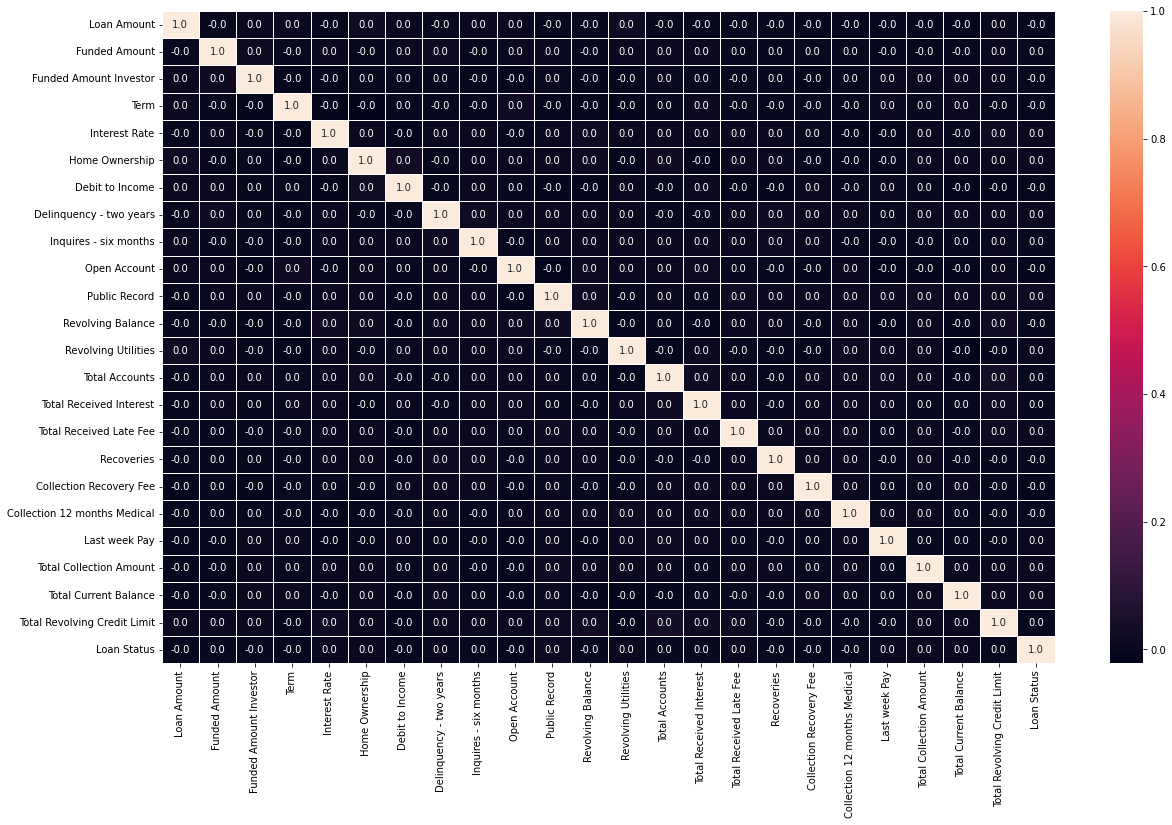

In [18]:
#Select and analyse important numerical features
corr = train_df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr,annot=True,linewidths=1,fmt='.1f')

# There is Actually no correlation between the features and our target

In [19]:
# Lets print the standard deviation of the numerical features:
train_df[num].std()

Loan Amount                       8367.865726
Funded Amount                     8150.992662
Funded Amount Investor            6785.345170
Term                                 3.327441
Interest Rate                        3.718629
Home Ownership                   45029.120366
Debit to Income                      8.451824
Delinquency - two years              0.800888
Inquires - six months                0.473291
Open Account                         6.225060
Public Record                        0.346606
Revolving Balance                 7836.148190
Revolving Utilities                 22.539450
Total Accounts                       8.319246
Total Received Interest           2221.918745
Total Received Late Fee              5.244365
Recoveries                         357.026346
Collection Recovery Fee              3.489885
Collection 12 months Medical         0.144385
Last week Pay                       43.315845
Total Collection Amount            744.382233
Total Current Balance           13

In [20]:
# Only consider the top features with more STD as they have high information

num = [i for i in num if train_df[i].std() > 5]

In [21]:
len(num) #8 columns dropped

16

In [22]:
#Lets check the categorical values
train_df[cate].nunique()

Batch Enrolled          41
Grade                    7
Sub Grade               35
Employment Duration      3
Verification Status      3
Payment Plan             1
Loan Title             109
Initial List Status      2
Application Type         2
dtype: int64

* Lets encode the Batch Enrolled, Sub Grade, Loan titles by the mean value of Loan Status

In [23]:
cols = [i for i in cate if train_df[i].nunique()>10]

for feature in cols:
    g = dict(train_df.groupby(feature)['Loan Status'].mean())
    train_df[feature] = train_df[feature].replace(g)
    test_df[feature] = test_df[feature].replace(g)

In [24]:
train_df[cols].head() #Replaced with mean of target values

,Batch Enrolled,Sub Grade,Loan Title
ID,,,
65087372,0.095068,0.093538,0.081828
1450153,0.105029,0.089912,0.090536
1969101,0.092179,0.090244,0.081828
6651430,0.092275,0.094201,0.090536
14354669,0.087944,0.090244,0.093986


New Category feature length: 6


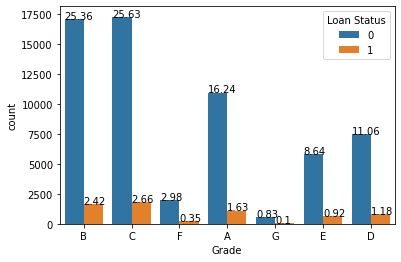

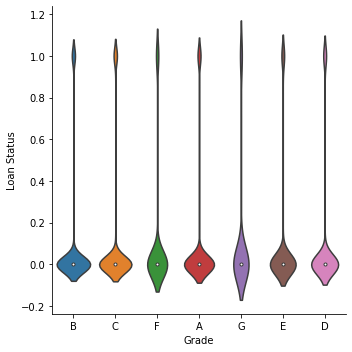

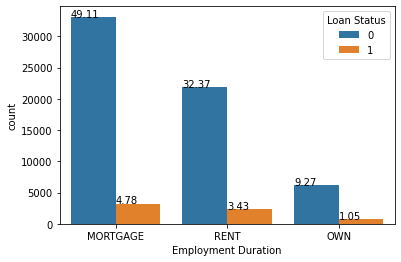

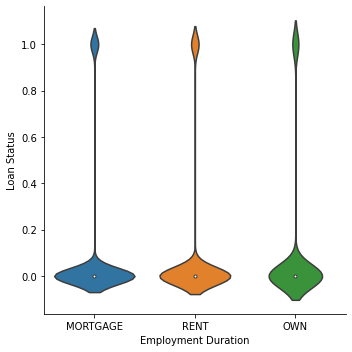

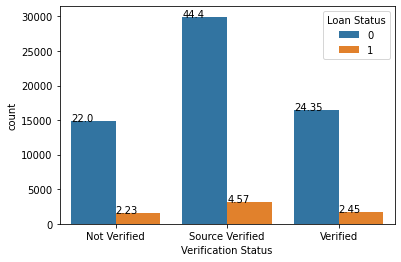

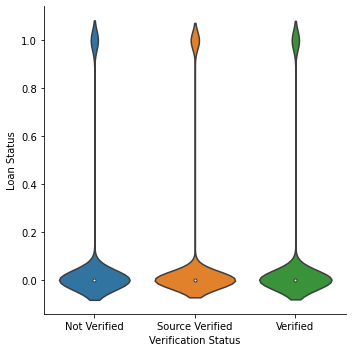

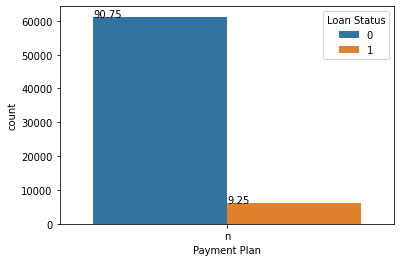

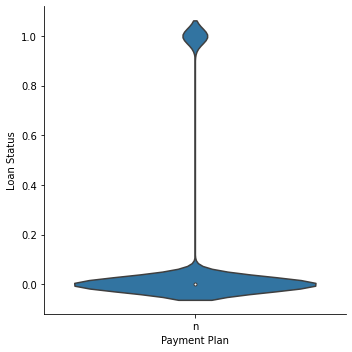

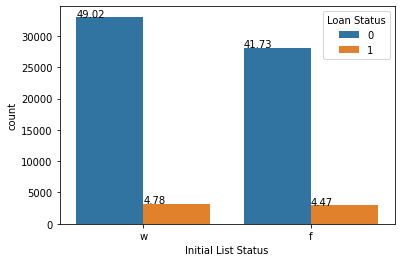

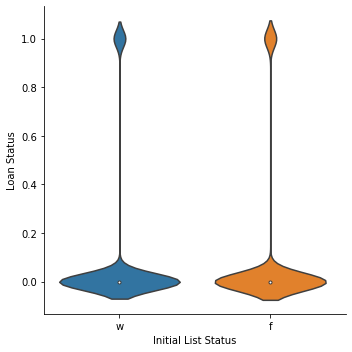

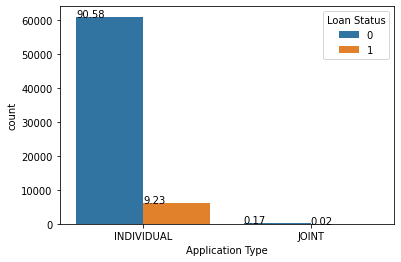

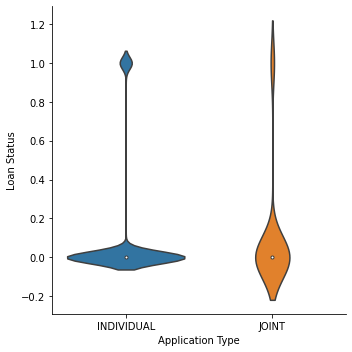

In [25]:
cate = [i for i in train_df.select_dtypes(include='object').columns]
print('New Category feature length:',len(cate))
# Visualize the remaining categorical features
for feature in cate:
    plot_categoricals(feature)

* As we already know it is very imbalanced data set.
* The violin plots are almost overlap each other, means that feature is not much useful to distinguish the class label

## Feature importance using various methods

In [26]:
# Perform OneHot Encoding for the remaining categorical features
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

print(train_df.shape, test_df.shape) 

(67463, 45) (28913, 45)


In [27]:
X = train_df.drop('Loan Status',1)
y = train_df['Loan Status']

X = np.array(X)
y = np.array(y)

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import log_loss,confusion_matrix,roc_auc_score,roc_curve,f1_score
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


from sklearn.feature_selection import SelectFromModel,chi2,SelectKBest

In [29]:
# Train Test Split
x_tr,x_ts,y_tr,y_ts = train_test_split(X,y,test_size = 0.3)

# 1. Using RandomForestClassifier to get the best features

In [30]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_tr, y_tr)
sfm = SelectFromModel(clf, threshold=0.1)
sfm.fit(x_tr, y_tr)
selected_features = sfm.get_support()
selected_features #It Shows no feature has importance

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

# 2. Using function SelectKBest with chi2 to get the best features

In [31]:
# Create a SelectKBest object with the chi-squared scoring function
selector = SelectKBest(chi2)
selector.fit(x_tr, y_tr)
selected_features = selector.get_support()
selected_features #Lets use them to check the score

array([ True,  True,  True, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False,  True,
        True, False, False, False, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [32]:
x_tr = x_tr[:,selected_features]

In [33]:
x_ts = x_ts[:,selected_features]

In [34]:
lr = SGDClassifier(loss='log')
lr.fit(x_tr,y_tr)
pred = lr.predict(x_ts)
roc_auc_score(y_ts,pred)

0.5002448623841763

In [35]:
lr = SGDClassifier(loss='hinge')
lr.fit(x_tr,y_tr)
pred = lr.predict(x_ts)
roc_auc_score(y_ts,pred)

0.5

# It's Very bad result

# Let's Use All The Features 
**(AUC score as metric since it is imbalanced data)**

In [36]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [37]:
lr = SGDClassifier(loss='log')
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
roc_auc_score(y_test,pred)

0.5

In [38]:
lr = SGDClassifier(loss='hinge')
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
roc_auc_score(y_test,pred)

0.5

In [39]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
roc_auc_score(y_test,pred)

0.5004566020860811

Lets test with Complex Models

In [40]:
rfc = RandomForestClassifier(random_state=10, n_jobs=-1)
rfc.fit(x_train,y_train)
pred = rfc.predict(x_test)
roc_auc_score(y_test,pred)

0.4999728216557047

In [41]:
xgb = XGBClassifier(n_jobs=-1)
xgb.fit(x_train,y_train)
pred = xgb.predict(x_test)
roc_auc_score(y_test,pred)

0.49978189452477056

# * **Since the complex models are also performing very bad, Lets Balance the data set using Oversampling method**

In [42]:
import imblearn
from imblearn.over_sampling import RandomOverSampler

In [43]:
sampler = RandomOverSampler()

In [44]:
X_res,y_res = sampler.fit_resample(X,y)

In [45]:
y_res.mean() # The data is perfectly balanced 50-50

0.5

In [46]:
x_train,x_test,y_train,y_test = train_test_split(X_res,y_res,test_size = 0.3, random_state=0)

In [47]:
lr = SGDClassifier(loss='log')
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
roc_auc_score(y_test,pred)

0.4981451421797839

In [48]:
lr = SGDClassifier(loss='hinge')
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
roc_auc_score(y_test,pred)

0.49550620402019674

*** The simple linear models like LinearSVM (SGD with hinge) and Logistic Regression (loss with log) Still perform poorly, Even after balancing the dataset**

In [49]:
knn = KNeighborsClassifier(n_jobs=-1)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
roc_auc_score(y_test,pred)

0.8262300793530886

In [50]:
rfc = RandomForestClassifier(random_state=10, n_jobs=-1)
rfc.fit(x_train,y_train)
pred = rfc.predict(x_test)
print('roc_score:',roc_auc_score(y_test,pred))
train_pred = rfc.predict(x_train)
print('Train_loss:',log_loss(train_pred,y_train))
print('Test_Loss:',log_loss(pred,y_test))

roc_score: 0.9995652410195098
Train_loss: 9.99200722162641e-16
Test_Loss: 0.015044188378001052


# RFC performed excellet
* **But it's Overfitting because there is huge difference in train and test loss**

In [51]:
xgb = XGBClassifier(n_jobs=-1)
xgb.fit(x_train,y_train)
pred = xgb.predict(x_test)
print('roc_score:',roc_auc_score(y_test,pred))
train_pred = xgb.predict(x_train)
print('Train_loss:',log_loss(train_pred,y_train))
print('Test_Loss:',log_loss(pred,y_test))

roc_score: 0.7984453747013155
Train_loss: 5.224590383174162
Test_Loss: 6.95877989117507


In [52]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train,y_train)
pred = gnb.predict(x_test)
print('roc_score:',roc_auc_score(y_test,pred))
train_pred = gnb.predict(x_train)
print('Train_loss:',log_loss(train_pred,y_train))
print('Test_Loss:',log_loss(pred,y_test)) #its not good at accuracy but its superfast

roc_score: 0.504436950703598
Train_loss: 17.02150701021875
Test_Loss: 17.140926879112456


**On the other hand Complex models performing really well, Especially Random Forest Classifier, Lets perform HyperParameter tuning and check for overfitting for KNN,RandomForest and XGBoost**

In [53]:
def plot_roc(fpr,tpr,fprts,tprts,name=''):
    plt.plot(fpr,tpr,'b--',label='train accuracy')
    plt.plot(fprts,tprts,'r--',label='test accuracy')
    plt.legend()
    plt.title('ROC Curve: '+name)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

In [54]:
def matrix(mat):
    plt.figure(figsize=(15,8))
    sns.heatmap(mat,annot=True,linewidths=1,fmt='.1f')
    plt.show()

# 1. KNN

In [55]:
# lets find the best value of K
score = {}
for k in range(1,30,2):
    knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    s = cross_val_score(knn,x_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
    score[s.mean()]=k
    print('Progress {}%'.format(round(k/29,2)*100))

print(score)    

Progress 3.0%
Progress 10.0%
Progress 17.0%
Progress 24.0%
Progress 31.0%
Progress 38.0%
Progress 45.0%
Progress 52.0%
Progress 59.0%
Progress 66.0%
Progress 72.0%
Progress 79.0%
Progress 86.0%
Progress 93.0%
Progress 100.0%
{0.9226811340567028: 1, 0.8514525726286314: 3, 0.7880294014700736: 5, 0.7344183875860459: 7, 0.6954847742387119: 9, 0.6715319099288297: 11, 0.6557461206393652: 13, 0.6455139423637848: 15, 0.6362734803406837: 17, 0.6287014350717535: 19, 0.6205110255512776: 21, 0.6156224477890562: 23, 0.6098004900245012: 25, 0.6047602380119007: 27, 0.6031034885077589: 29}


In [56]:
print('Best K value:',score[max(score)])

Best K value: 1


In [57]:
x=[]
y=[]
for acc,k in score.items():
    x.append(k)
    y.append(acc)


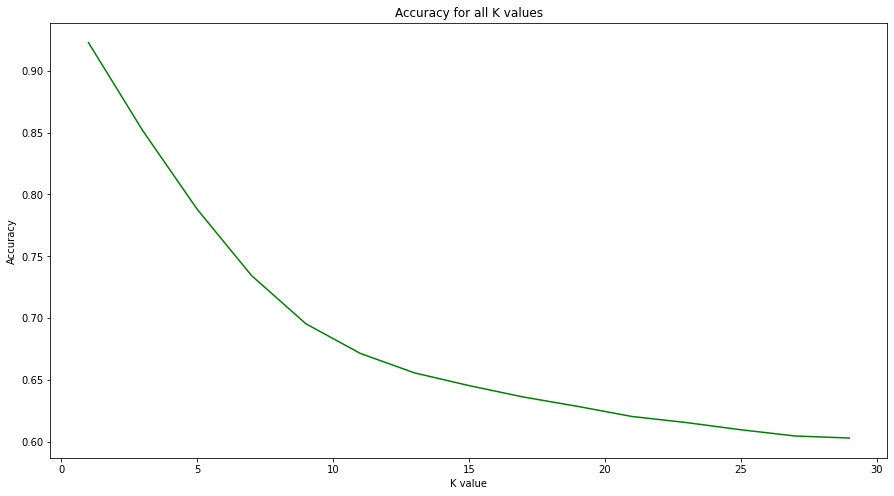

In [58]:
plt.figure(figsize=(15,8))
plt.plot(x,y,'g-')
plt.title('Accuracy for all K values')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.show()

F1Score: 0.9388484616366655
AUC_Score: 0.9346822431468212


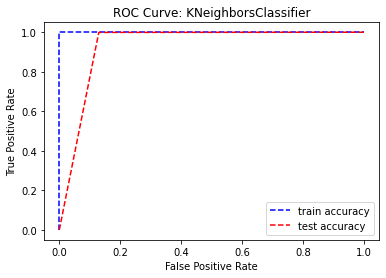

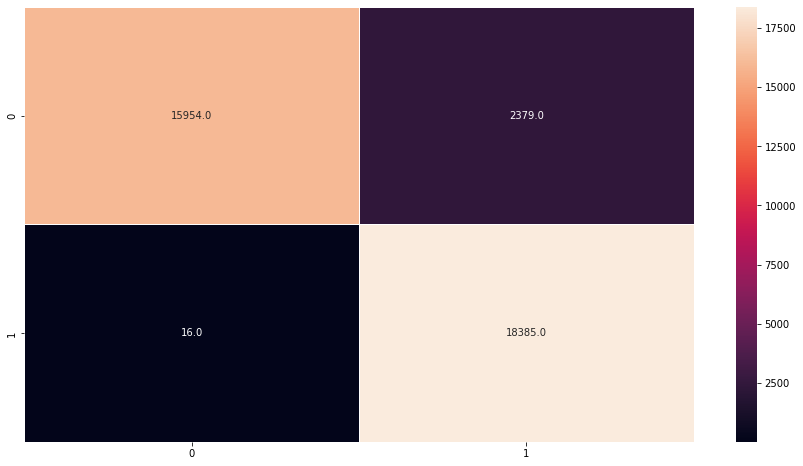

Train_loss: 9.99200722162641e-16
Test_Loss: 2.2518751635914955


In [59]:
knn = KNeighborsClassifier(n_neighbors=score[max(score)],n_jobs=-1)
knn.fit(x_train,y_train)
train_pred = knn.predict(x_train)
pred=knn.predict(x_test)
print('F1Score:',f1_score(y_test,pred))
print('AUC_Score:',roc_auc_score(y_test,pred))
mat = confusion_matrix(y_test,pred)
fpr,tpr,_ = roc_curve(y_train,train_pred)
fprts,tprts,_=roc_curve(y_test,pred)
plot_roc(fpr,tpr,fprts,tprts,'KNeighborsClassifier')
matrix(mat)
print('Train_loss:',log_loss(train_pred,y_train))
print('Test_Loss:',log_loss(pred,y_test))

* We can see that there is significant difference between train and test loss
* This implies KNN is overfitting

# 2.XGBoost

F1Score: 0.9494556356177353
AUC_Score: 0.9476160397238756


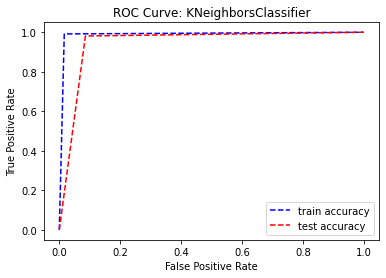

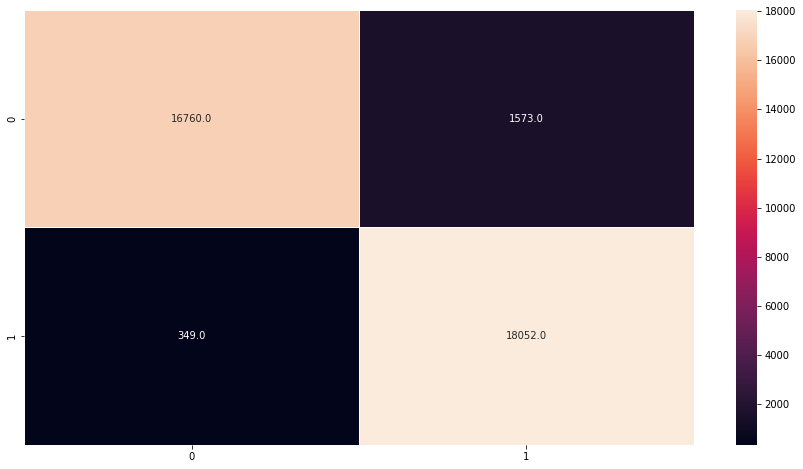

Train_loss: 0.4303780870659682
Test_Loss: 1.8071488890543228


In [60]:
xgb = XGBClassifier(n_jobs=-1)
param_grid = {'max_depth': [3, 5, 7],
              'n_estimators': [50, 100, 250]
             }
xgb_grid = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid.fit(x_train,y_train)
train_pred = xgb_grid.predict(x_train)
pred=xgb_grid.predict(x_test)
print('F1Score:',f1_score(y_test,pred))
print('AUC_Score:',roc_auc_score(y_test,pred))
mat = confusion_matrix(y_test,pred)
fpr,tpr,_ = roc_curve(y_train,train_pred)
fprts,tprts,_=roc_curve(y_test,pred)
plot_roc(fpr,tpr,fprts,tprts,'KNeighborsClassifier')
matrix(mat)
print('Train_loss:',log_loss(train_pred,y_train))
print('Test_Loss:',log_loss(pred,y_test))

# 3.RandomForestClassifier

F1Score: 0.6601484209956124
AUC_Score: 0.6584018855231144


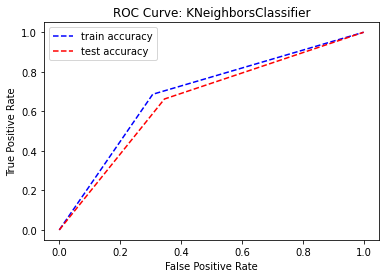

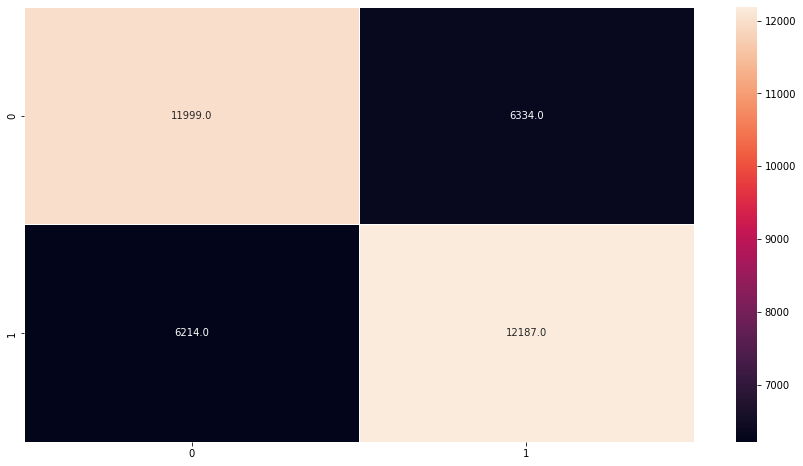

Train_loss: 10.720000833616744
Test_Loss: 11.798266861811141


In [61]:
rfc = RandomForestClassifier(n_jobs=-1)
param_grid = {'n_estimators': [50, 100, 250],
              'max_depth': [3, 5, 7]
              }
rfc_grid = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rfc_grid.fit(x_train, y_train)
train_pred = rfc_grid.predict(x_train)
pred=rfc_grid.predict(x_test)
print('F1Score:',f1_score(y_test,pred))
print('AUC_Score:',roc_auc_score(y_test,pred))
mat = confusion_matrix(y_test,pred)
fpr,tpr,_ = roc_curve(y_train,train_pred)
fprts,tprts,_=roc_curve(y_test,pred)
plot_roc(fpr,tpr,fprts,tprts,'KNeighborsClassifier')
matrix(mat)
print('Train_loss:',log_loss(train_pred,y_train))
print('Test_Loss:',log_loss(pred,y_test))
